In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [26]:
df.head(5)

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [10]:
df = df[['sepal_length', 'petal_length', 'species']]

In [11]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [12]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [15]:
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [16]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 2)

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [20]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

In [21]:
clf.coef_

array([[-0.21008149, -2.92359787],
       [ 0.34717809, -0.35033387],
       [-0.13709661,  3.27393174]])

In [22]:
clf.intercept_

array([ 11.42312524,   1.60537323, -13.02849847])

In [25]:
query = np.array([[3.7,2.1]])
clf.predict_proba(query)

C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.13084230e-01, 8.69028623e-02, 1.29075953e-05]])

C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


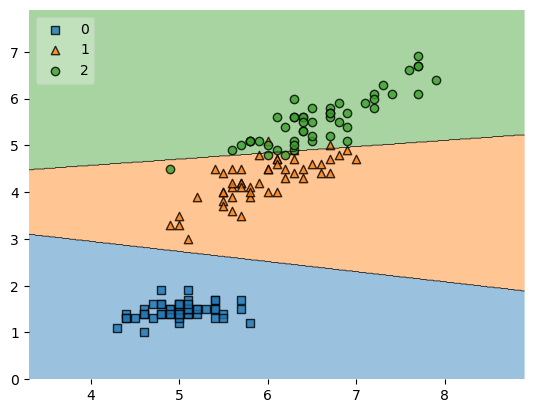

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf, legend=2)
plt.show()